# Modeling the global energy budget

**Introducing the zero-dimensional Energy Balance Model**

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

____________
## 1. Recap of the global energy budget
____________

Let's look again at the observations {cite:p}`Trenberth:2012a`:

![Observed global energy flows from Trenberth and Fasullo (2012)](../images/GlobalEnergyBudget.png)

____________
## 2. Tuning radiative fluxes to the observations
____________

### Recap of our simple greenhouse model

Last class we introduced a very simple model for the **OLR** or Outgoing Longwave Radiation to space:

$$ \text{OLR} = \tau \sigma T_s^4 $$

where $\tau$ is the **transmissivity** of the atmosphere, a number less than 1 that represents the greenhouse effect of Earth's atmosphere.

We also tuned this model to the observations by choosing $ \tau \approx 0.61$.

More precisely:

In [1]:
OLRobserved = 238.5  # in W/m2
sigma = 5.67E-8  # S-B constant
Tsobserved = 288.  # global average surface temperature
tau = OLRobserved / sigma / Tsobserved**4  # solve for tuned value of transmissivity
print(tau)

0.6114139923687016


Let's now deal with the shortwave (solar) side of the energy budget.

### Absorbed Shortwave Radiation (ASR) and Planetary Albedo

Let's define a few terms.

#### Global mean insolation

From the observations, the area-averaged incoming solar radiation or **insolation** is 341.3 W m$^{-2}$.

Let's denote this quantity by $Q$.

In [2]:
Q = 341.3  # the insolation

#### Planetary albedo

Some of the incoming radiation is not absorbed at all but simply reflected back to space. Let's call this quantity $F_{reflected}$

From observations we have:

In [3]:
Freflected = 101.9  #  reflected shortwave flux in W/m2


The **planetary albedo** is the fraction of $Q$ that is reflected.

We will denote the planetary albedo by $\alpha$.

From the observations:

In [4]:
alpha = Freflected / Q
print(alpha)

0.29856431292118374


That is, about 30% of the incoming radiation is reflected back to space.

#### Absorbed Shortwave Radiation

The **Absorbed Shortwave Radiation** or ASR is the part of the incoming sunlight that is *not* reflected back to space, i.e. that part that is absorbed somewhere within the Earth system.

Mathematically we write

$$ \text{ASR} = Q - F_{reflected} = (1-\alpha) Q $$

From the observations:

In [5]:
ASRobserved = Q - Freflected
print(ASRobserved)

239.4


As we noted last time, this number is *just slightly greater* than the observed OLR of 238.5 W m$^{-2}$.

____________
## 3. Equilibrium temperature
____________

*This is one of the central concepts in climate modeling.*

The Earth system is in **energy balance** when energy in = energy out, i.e. when

$$ \text{ASR} = \text{OLR} $$

We want to know:

- What surface temperature do we need to have this balance?
- By how much would the temperature change in response to other changes in Earth system?
    - Changes in greenhouse gases
    - Changes in cloudiness
    - etc.




With our simple greenhouse model, we can get an **exact solution** for the equilibrium temperature.

First, write down our statement of energy balance:

$$ (1-\alpha) Q = \tau \sigma T_s^4 $$

Rearrange to solve for $T_s$:

$$ T_s^4 = \frac{(1-\alpha) Q}{\tau \sigma} $$

and take the fourth root, denoting our **equilibrium temperature** as $T_{eq}$:

$$ T_{eq} = \left( \frac{(1-\alpha) Q}{\tau \sigma} \right)^\frac{1}{4} $$

Plugging the observed values back in, we compute:

In [6]:
#  define a reusable function!
def equilibrium_temperature(alpha,Q,tau):
    return ((1-alpha)*Q/(tau*sigma))**(1/4)

Teq_observed = equilibrium_temperature(alpha,Q,tau)
print(Teq_observed)

288.27131447889224


And this equilibrium temperature is *just slightly warmer* than 288 K.  Why?

____________
## 4. A climate change scenario
____________

Suppose that, due to global warming (changes in atmospheric composition and subsequent changes in cloudiness):

- The longwave transmissitivity decreases to $\tau = 0.57$ 
- The planetary albedo increases to $\alpha = 0.32$

What is the ***new equilibrium temperature***?

For this very simple model, we can work out the answer exactly:

In [7]:
Teq_new = equilibrium_temperature(0.32,Q,0.57)
#  an example of formatted print output, limiting to two or one decimal places
print('The new equilibrium temperature is {:.2f} K.'.format(Teq_new))
print('The equilibrium temperature increased by about {:.1f} K.'.format(Teq_new-Teq_observed))

The new equilibrium temperature is 291.10 K.
The equilibrium temperature increased by about 2.8 K.


Most climate models are more complicated mathematically, and solving directly for the equilibrium temperature will not be possible! 

Instead, we will be able to use the model to calculate the terms in the energy budget (ASR and OLR).

### Python exercise

- Write Python functions to calculate ASR and OLR for *arbitrary parameter values*.
- Verify the following:
    - With the new parameter values but the old temperature $T = 288$ K, is ASR greater or lesser than OLR? 
    - Is the Earth gaining or losing energy?
    - How does your answer change if $T = 295$ K (or any other temperature greater than 291 K)?

____________
## 5. A time-dependent Energy Balance Model
____________

The above exercise shows us that if some properties of the climate system change in such a way that the **equilibrium temperature goes up**, then the Earth system *receives more energy from the sun than it is losing to space*. The system is **no longer in energy balance**.

The temperature must then increase to get back into balance. The increase will not happen all at once! It will take time for energy to accumulate in the climate system. We want to model this **time-dependent adjustment** of the system.

In fact almost all climate models are **time-dependent**, meaning the model calculates **time derivatives** (rates of change) of climate variables.

### An energy balance **equation**

We will write the **total energy budget** of the Earth system as

$$
\begin{align} 
\frac{dE}{dt} &= \text{net energy flux in to system} \\
 &= \text{flux in – flux out} \\
 &= \text{ASR} - \text{OLR}
\end{align}
$$

where $E$ is the **enthalpy** or **heat content** of the total system.

We will express the budget **per unit surface area**, so each term above has units W m$^{-2}$

Note: any **internal exchanges** of energy between different reservoirs (e.g. between ocean, land, ice, atmosphere) do not appear in this budget – because $E$ is the **sum of all reservoirs**.

Also note: **This is a generically true statement.** We have just defined some terms, and made the (very good) assumption that the only significant energy sources are radiative exchanges with space.

**This equation is the starting point for EVERY CLIMATE MODEL.**

But so far, we don’t actually have a MODEL. We just have a statement of a budget. To use this budget to make a model, we need to relate terms in the budget to state variables of the atmosphere-ocean system.

For now, the state variable we are most interested in is **temperature** – because it is directly connected to the physics of each term above.



### An energy balance **model**

If we now suppose that 

$$ E = C T_s $$

where $T_s$ is the **global mean surface temperature**, and $C$ is a constant – the **effective heat capacity** of the atmosphere- ocean column.

then our budget equation becomes:


$$ C \frac{dT_s}{dt} = \text{ASR} - \text{OLR} $$

where

- $C$ is the **heat capacity** of Earth system, in units of J m$^{-2}$ K$^{-1}$.
- $\frac{dT_s}{dt}$ is the rate of change of global average surface temperature.

By adopting this equation, we are assuming that the energy content of the Earth system (atmosphere, ocean, ice, etc.) is *proportional to surface temperature*.

Important things to think about:

- Why is this a sensible assumption?
- What determines the heat capacity $C$?
- What are some limitations of this assumption?


For our purposes here we are going to use a value of C equivalent to heating 100 meters of water:

$$C = c_w \rho_w H$$

where 

$c_w = 4 \times 10^3$ J kg$^{-1}$ $^\circ$C$^{-1}$ is the specific heat of water,

$\rho_w = 10^3$ kg m$^{-3}$ is the density of water, and

$H$ is an effective depth of water that is heated or cooled.

In [8]:
c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 100.   #  Depth of water in m
C = c_w * rho_w * H   #  Heat capacity of the model 
print('The effective heat capacity is {:.1e} J/m2/K'.format(C))

The effective heat capacity is 4.0e+08 J/m2/K


### Solving the energy balance model

This is a first-order Ordinary Differential Equation (ODE) for $T_s$ as a function of time. It is also **our very first climate model!**

To solve it (i.e. see how $T_s$ evolves from some specified initial condition) we have two choices:

1. Solve it analytically
2. Solve it numerically

Option 1 (analytical) will usually not be possible because the equations will typically be too complex and non-linear. This is why computers are our best friends in the world of climate modeling.

HOWEVER it is often useful and instructive to simplify a model down to something that is analytically solvable when possible. Why? Two reasons:

1. Analysis will often yield a deeper understanding of the behavior of the system
2. Gives us a benchmark against which to test the results of our numerical solutions.

____________
## 6. Representing time derivatives on a computer
____________

Recall that the derivative is the **instantaneous rate of change**. It is defined as 

$$ \frac{dT}{dt} = \lim_{\Delta t\rightarrow 0}⁡ \frac{\Delta T}{\Delta t}$$

- **On the computer there is no such thing as an instantaneous change.** 
- We are always dealing with *discrete quantities*.
- So we approximate the derivative with $\Delta T/ \Delta t$. 
- So long as we take the time interval $\Delta t$ "small enough", the approximation is valid and useful.
- (The meaning of "small enough" varies widely in practice. Let's not talk about it now)

So we write our model as

$$ C  \frac{\Delta T}{\Delta t} \approx \text{ASR} - \text{OLR}$$

where $\Delta T$ is the **change in temperature predicted by our model** over a short time interval $\Delta t$.

We can now use this to **make a prediction**: 

Given a current temperature $T_1$ at time $t_1$, what is the temperature $T_2$ at a future time $t_2$?

We can write

$$ \Delta T = T_2-T_1 $$
$$ \Delta t = t_2-t_1 $$

and so our model says

$$ C  \frac{T_2-T_1}{\Delta t} = \text{ASR} - \text{OLR} $$

Which we can rearrange to **solve for the future temperature**:

$$ T_2 = T_1 + \frac{\Delta t}{C} \left( \text{ASR} - \text{OLR}(T_1) \right)  $$

We now have a formula with which to make our prediction!

Notice that we have written the OLR as a *function of temperature*. We will use the current temperature $T_1$ to compute the OLR, and use that OLR to determine the future temperature.

____________
## 7. Numerical solution of the Energy Balance Model
____________

The quantity $\Delta t$ is called a **timestep**. It is the smallest time interval represented in our model.

Here we're going to use a timestep of 1 year:

In [9]:
dt = 60. * 60. * 24. * 365.   # one year expressed in seconds

### Try stepping forward one timestep

In [10]:
# Try a single timestep, assuming we have working functions for ASR and OLR
T1 = 288.
T2 = T1 + dt / C * ( ASR(alpha=0.32) - OLR(T1, tau=0.57) )
print(T2)

NameError: name 'ASR' is not defined

***Did you get a `NameError` here?***

The code above assumes that we have already defined functions `ASR()` and `OLR()`. If you haven't completed the exercise above, then the code won't work.

Let's now define the functions that we were supposed to create above:

In [11]:
def ASR(Q=Q, alpha=alpha):
    return (1-alpha)*Q

def OLR(T, tau=tau):
    return tau * sigma * T**4

Now we'll try again...

In [12]:
# Try a single timestep, assuming we have working functions for ASR and OLR
T1 = 288.
T2 = T1 + dt / C * ( ASR(alpha=0.32) - OLR(T1, tau=0.57) )
print(T2)

288.7678026614462


What happened? Why?

Try another timestep

In [13]:
T1 = T2
T2 = T1 + dt / C * ( ASR(alpha=0.32) - OLR(T1, tau=0.57) )
print(T2)

289.3479210238739


Warmed up again, but by a smaller amount.

But this is tedious typing. Time to **define a function** to make things easier and more reliable:

In [14]:
def step_forward(T):
    return T + dt / C * ( ASR(alpha=0.32) - OLR(T, tau=0.57) )

Try it out with an arbitrary temperature:

In [15]:
step_forward(300.)

297.658459884

Notice that our function calls other functions and variables we have already defined.

#### Python fact 10: Functions can access variables and other functions defined outside of the function. 

This is both very useful and occasionally confusing.

### Automate the timestepping with a loop

Now let's really harness the power of the computer by **making a loop** (and storing values in arrays):

In [16]:
import numpy as np

numsteps = 20
Tsteps = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps[0] = 288. 
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps[n+1] = step_forward( Tsteps[n] )
print(Tsteps)

[288.         288.76780266 289.34792102 289.78523685 290.11433323
 290.36166675 290.54736768 290.68669049 290.79115953 290.86946109
 290.92813114 290.97208122 291.00499865 291.02964965 291.0481083
 291.06192909 291.07227674 291.08002371 291.08582346 291.09016532
 291.09341571]


What did we just do?

- Created an array of zeros
- set the initial temperature to 288 K
- repeated our time step 20 times. 
- Stored the results of each time step into the array.

#### Python fact 11: the `for` statement executes a statement (or series of statements) a specified number of times (a loop!)

#### Python fact 12: Use square bracket [ ] to refer to elements of an array or list. Use round parentheses ( ) for function arguments. 

### Plotting the result

Now let's draw a picture of our result!

In [17]:
# a special instruction for the Jupyter notebook
#   Display all plots inline in the notebook
%matplotlib inline  
#  import the plotting package
import matplotlib.pyplot as plt

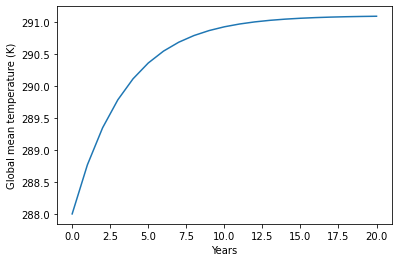

In [18]:
plt.plot(Years, Tsteps)
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');

Note how the temperature *adjusts smoothly toward the equilibrium temperature*, that is, the temperature at which
ASR = OLR.

**If the planetary energy budget is out of balance, the temperature must change so that the OLR gets closer to the ASR!**

The adjustment is actually an *exponential decay* process: The rate of adjustment slows as the temperature approaches equilibrium. 

The temperature gets very very close to equilibrium but never reaches it exactly.

#### Python fact 13: We can easily make simple graphs with the function `plt.plot(x,y)`, where `x` and `y` are arrays of the same size. But we must import it first. 

This is actually not native Python, but uses a graphics library called [matplotlib](https://matplotlib.org). This is the workhorse of scientific plotting in Python, and we will be using it all the time!

Just about all of our notebooks will start with this:
```
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
```

____________
## 8. Summary and take-away messages
____________

- We looked at the flows of energy in and out of the Earth system. 
- These are determined by radiation at the top of the Earth's atmosphere.
- Any imbalance between shortwave absorption (ASR) and longwave emission (OLR) drives a change in temperature
- Using this idea, we built a climate model!
- This **Zero-Dimensional Energy Balance Model** solves for the global, annual mean surface temperature $T_s$
- Two key assumptions:
    - Energy content of the Earth system varies proportionally to $T_s$
    - The OLR increases as $\tau \sigma T_s^4$ (our simple greenhouse model)
- Earth (or any planet) has a well-defined **equilibrium temperature** $T_{eq}$ at which ASR = OLR, because of the *temperature dependence of the outgoing longwave radiation*.

- If $T_s < T_{eq}$, the model will warm up.
- We can represent the continous warming process on the computer using discrete timesteps.
- We can plot the result.

____________
## Credits
____________

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.